In [1]:
import spacy

In [2]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
model=CountVectorizer()
model.fit(["Nepal has consistently been ranked as one of the poorest countries in the world. Nepal has used a series of five-year plans in an attempt to make progress in economic development."])
model.vocabulary_

{'nepal': 12,
 'has': 9,
 'consistently': 4,
 'been': 3,
 'ranked': 18,
 'as': 1,
 'one': 14,
 'of': 13,
 'the': 20,
 'poorest': 16,
 'countries': 5,
 'in': 10,
 'world': 23,
 'used': 22,
 'series': 19,
 'five': 8,
 'year': 24,
 'plans': 15,
 'an': 0,
 'attempt': 2,
 'to': 21,
 'make': 11,
 'progress': 17,
 'economic': 7,
 'development': 6}

In [3]:
model=CountVectorizer(ngram_range=(1,2))
model.fit(["Nepal has consistently been ranked as one of the poorest countries in the world. Nepal has used a series of five-year plans in an attempt to make progress in economic development."])
model.vocabulary_

{'nepal': 26,
 'has': 17,
 'consistently': 8,
 'been': 6,
 'ranked': 39,
 'as': 2,
 'one': 31,
 'of': 28,
 'the': 43,
 'poorest': 35,
 'countries': 10,
 'in': 20,
 'world': 50,
 'used': 48,
 'series': 41,
 'five': 15,
 'year': 52,
 'plans': 33,
 'an': 0,
 'attempt': 4,
 'to': 46,
 'make': 24,
 'progress': 37,
 'economic': 13,
 'development': 12,
 'nepal has': 27,
 'has consistently': 18,
 'consistently been': 9,
 'been ranked': 7,
 'ranked as': 40,
 'as one': 3,
 'one of': 32,
 'of the': 30,
 'the poorest': 44,
 'poorest countries': 36,
 'countries in': 11,
 'in the': 23,
 'the world': 45,
 'world nepal': 51,
 'has used': 19,
 'used series': 49,
 'series of': 42,
 'of five': 29,
 'five year': 16,
 'year plans': 53,
 'plans in': 34,
 'in an': 21,
 'an attempt': 1,
 'attempt to': 5,
 'to make': 47,
 'make progress': 25,
 'progress in': 38,
 'in economic': 22,
 'economic development': 14}

In [4]:
model=CountVectorizer(ngram_range=(1,3))
model.fit(["Nepal has consistently been ranked as one of the poorest countries in the world. Nepal has used a series of five-year plans in an attempt to make progress in economic development."])
model.vocabulary_

{'nepal': 39,
 'has': 24,
 'consistently': 12,
 'been': 9,
 'ranked': 60,
 'as': 3,
 'one': 48,
 'of': 43,
 'the': 66,
 'poorest': 54,
 'countries': 15,
 'in': 29,
 'world': 77,
 'used': 74,
 'series': 63,
 'five': 21,
 'year': 80,
 'plans': 51,
 'an': 0,
 'attempt': 6,
 'to': 71,
 'make': 36,
 'progress': 57,
 'economic': 19,
 'development': 18,
 'nepal has': 40,
 'has consistently': 25,
 'consistently been': 13,
 'been ranked': 10,
 'ranked as': 61,
 'as one': 4,
 'one of': 49,
 'of the': 46,
 'the poorest': 67,
 'poorest countries': 55,
 'countries in': 16,
 'in the': 34,
 'the world': 69,
 'world nepal': 78,
 'has used': 27,
 'used series': 75,
 'series of': 64,
 'of five': 44,
 'five year': 22,
 'year plans': 81,
 'plans in': 52,
 'in an': 30,
 'an attempt': 1,
 'attempt to': 7,
 'to make': 72,
 'make progress': 37,
 'progress in': 58,
 'in economic': 32,
 'economic development': 20,
 'nepal has consistently': 41,
 'has consistently been': 26,
 'consistently been ranked': 14,
 'be

In [5]:
nlp=spacy.load("en_core_web_sm")
def filtered_words(text):
    filtered_text=[]
    doc=nlp(text)
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_text.append(token.lemma_)
    return " ".join(filtered_text)

In [6]:
filtered_words("Nepal is having many corruption problem.")

'Nepal have corruption problem'

In [7]:
filtered_words("Loki is eating pizza")

'Loki eat pizza'

In [8]:
model.transform(["Nepal is having many corruption problem."]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
import pandas as pd
df=pd.read_json("/kaggle/input/json-dataset2/news_dataset.json")
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [10]:
df.shape

(12695, 2)

In [11]:
df.columns

Index(['text', 'category'], dtype='object')

In [12]:
df.columns.value_counts()

text        1
category    1
Name: count, dtype: int64

In [13]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [14]:
min_samples=1381
df_business=df[df['category']=="BUSINESS"].sample(min_samples,random_state=42)
df_sports=df[df['category']=="SPORTS"].sample(min_samples,random_state=42)
df_crime=df[df['category']=="CRIME"].sample(min_samples,random_state=42)
df_science=df[df['category']=="SCIENCE"].sample(min_samples,random_state=42)

In [15]:
df_balanced=pd.concat([df_business,df_sports,df_crime,df_science],axis=0)

In [16]:
df_balanced['category'].value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [17]:
df_balanced['category_num']=df['category'].map({"BUSINESS":0,"SPORTS":1,"CRIME":2,"SCIENCE":3})

In [18]:
df_balanced

,text,category,category_num
594,How to Develop the Next Generation of Innovato...,BUSINESS,0
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS,0
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS,0
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS,0
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS,0
...,...,...,...
9924,A Call for Data Literacy If we care about youn...,SCIENCE,3
10219,Here's What Happens When Someone Sneezes On An...,SCIENCE,3
11884,Most People Don't See How Climate Change Is Af...,SCIENCE,3
7854,"Watch Octopuses Meet for Blind Date, Tricky Se...",SCIENCE,3


# Model Building

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
x=df_balanced['text']
y=df_balanced['category_num']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=df_balanced.category_num)


In [20]:
X_test.shape

(1105,)

In [21]:
X_train.shape

(4419,)

In [22]:
y_test.shape

(1105,)

In [23]:
y_train.shape

(4419,)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       276
           1       0.92      0.85      0.88       276
           2       0.91      0.89      0.90       277
           3       0.89      0.82      0.85       276

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105



Text(70.72222222222221, 0.5, 'truth')

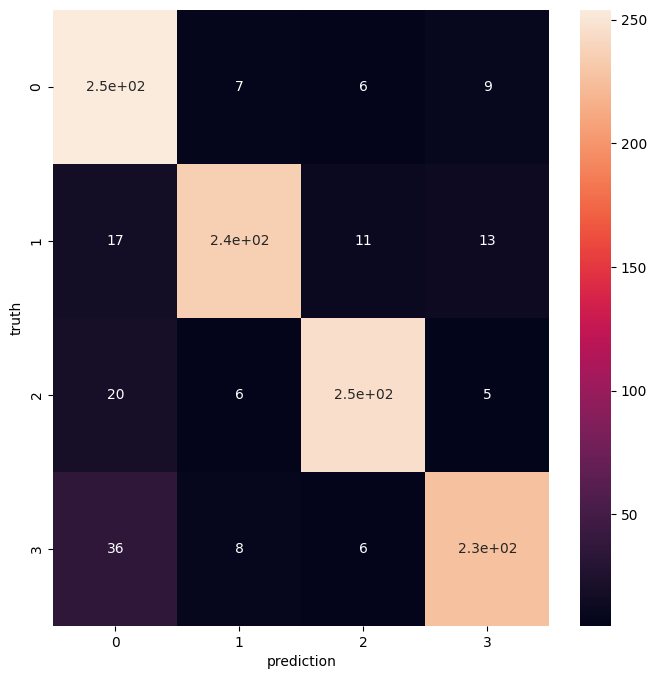

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("truth")